In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
data=data.rename(columns={'age':'Age','sex':'Sex','cp':'Cp','trestbps':'Trestbps','chol':'Chol','fbs':'Fbs','restecg':'Restecg',
                          'thalach':'Thalach','exang':'Exang','oldpeak':'Oldpeak','slope':'Slope','ca':'Ca','thal':'Thal',
                          'target':'Target'})

In [8]:
data.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')

In [9]:
data.shape

(303, 14)

In [10]:
data.isnull().sum()

Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
Ca          0
Thal        0
Target      0
dtype: int64

In [11]:
data.isnull().values.any()

False

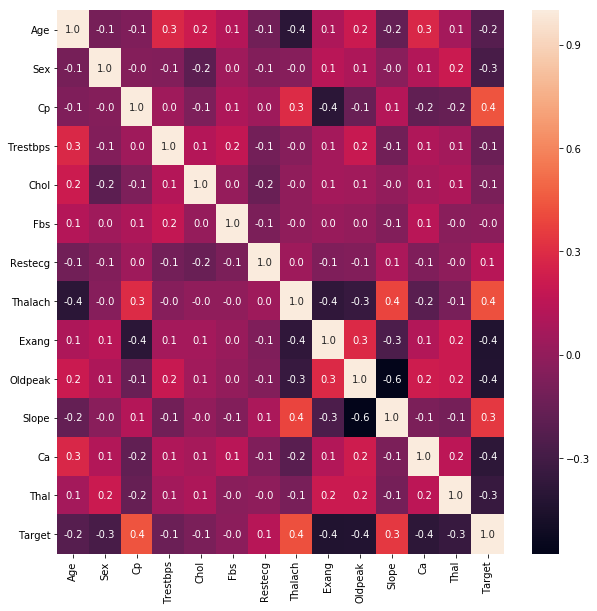

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

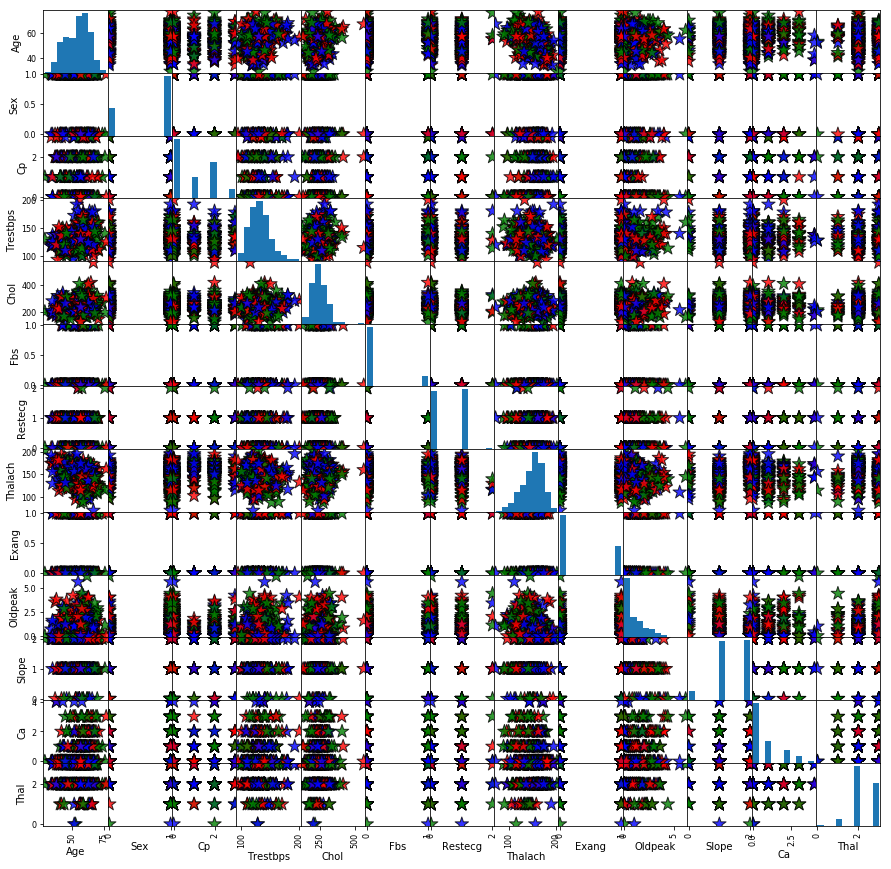

In [13]:
pd.plotting.scatter_matrix(data.loc[:,data.columns!='Target'],
                          c=['green','red','blue'],
                          figsize=[15,15],
                          diagonal='hist',
                          alpha=0.8,
                          s=200,
                          marker='*',
                          edgecolor='black')
plt.show()

Age Analysis

In [14]:
data.Age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: Age, dtype: int64

In [15]:
data.Age.value_counts()[:10]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: Age, dtype: int64

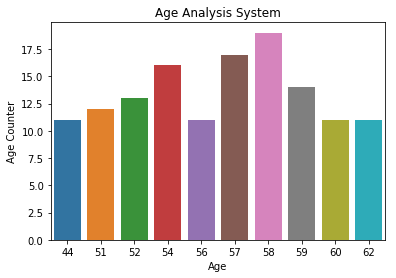

In [16]:
sns.barplot(x=data.Age.value_counts()[:10].index,y=data.Age.value_counts()[:10].values)
plt.xlabel("Age")
plt.ylabel("Age Counter")
plt.title("Age Analysis System")
plt.show()

In [17]:
minAge = min(data.Age)
maxAge = max(data.Age)
meanAge = data.Age.mean()
print("Min Age : ",minAge)
print("Max Age : ",maxAge)
print("Mean Age : ",meanAge)

Min Age :  29
Max Age :  77
Mean Age :  54.366336633663366


In [18]:
young_ages = data[(data.Age>=29)&(data.Age<40)]
middle_ages = data[(data.Age>=40)&(data.Age<55)]
elder_ages = data[(data.Age>=55)]
print("Young Ages : ",len(young_ages))
print("Middle Ages : ",len(middle_ages))
print("Elder Ages : ",len(elder_ages))

Young Ages :  16
Middle Ages :  128
Elder Ages :  159


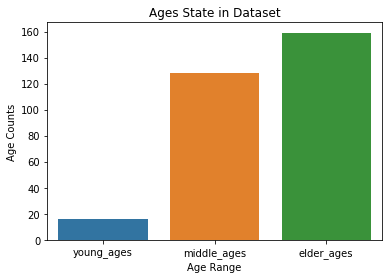

In [19]:
sns.barplot(x=['young_ages','middle_ages','elder_ages'],y=[len(young_ages),len(middle_ages),len(elder_ages)])
plt.xlabel("Age Range")
plt.ylabel("Age Counts")
plt.title("Ages State in Dataset")
plt.show()

In [20]:
data['AgeRange'] = 0
youngAge_index = data[(data.Age>=29)&(data.Age<40)].index
middleAge_index = data[(data.Age>=40)&(data.Age<55)].index
elderAge_index = data[(data.Age>=55)].index

In [21]:
for index in youngAge_index:
    data.loc[index,'AgeRange'] = 0
for index in middleAge_index:
    data.loc[index,'AgeRange'] = 1
for index in elderAge_index:
    data.loc[index,'AgeRange'] = 2

Gender Analysis

In [22]:
data.Sex.value_counts()

1    207
0     96
Name: Sex, dtype: int64

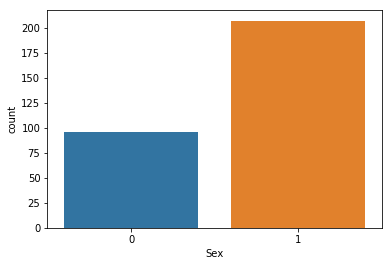

In [23]:
sns.countplot(data.Sex)
plt.show()

In [24]:
total_gender_count = len(data.Sex)
male_count = len(data[data['Sex'] == 1])
female_count = len(data[data['Sex'] == 0])
print("Total Gender : ",total_gender_count)
print("Total Male : ",male_count)
print("Total Female : ",female_count)

Total Gender :  303
Total Male :  207
Total Female :  96


In [25]:
print("Male Percentage : {:.2f}%".format((male_count/(total_gender_count)*100)))
print("Female Percentage : {:.2f}%".format((female_count/(total_gender_count)*100)))

Male Percentage : 68.32%
Female Percentage : 31.68%


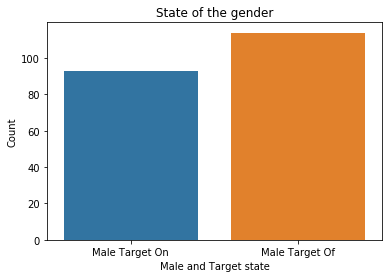

In [26]:
male_andtarget_on = len(data[(data['Sex'] == 1)&(data['Target'] == 1)])
male_andtarget_of = len(data[(data['Sex'] == 1)&(data['Target'] == 0)])
sns.barplot(x=['Male Target On','Male Target Of'],y=[male_andtarget_on,male_andtarget_of])
plt.xlabel("Male and Target state")
plt.ylabel("Count")
plt.title("State of the gender")
plt.show()

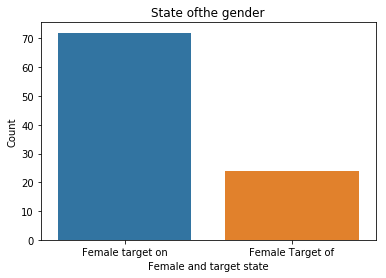

In [27]:
female_andtarget_on = len(data[(data["Sex"] == 0)&(data['Target'] == 1)])
female_andtarget_of = len(data[(data['Sex'] == 0)&(data['Target'] == 0)])
sns.barplot(x=['Female target on','Female Target of'],y=[female_andtarget_on,female_andtarget_of])
plt.xlabel("Female and target state")
plt.ylabel("Count")
plt.title("State ofthe gender")
plt.show()

Chest Pain Analysis

In [28]:
data.Cp.value_counts()

0    143
2     87
1     50
3     23
Name: Cp, dtype: int64

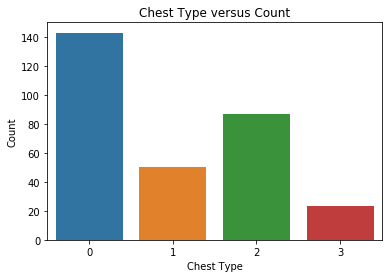

In [29]:
sns.countplot(data.Cp)
plt.xlabel("Chest Type")
plt.ylabel("Count")
plt.title("Chest Type versus Count")
plt.show()

In [30]:
cp_zero_target_zero = len(data[(data.Cp == 0)&(data.Target == 0)])
cp_zero_target_one = len(data[(data.Cp == 0)&(data.Target == 1)])
print("Cp Zero Target Zero",cp_zero_target_zero)
print("Cp Zero Target One",cp_zero_target_one)

Cp Zero Target Zero 104
Cp Zero Target One 39


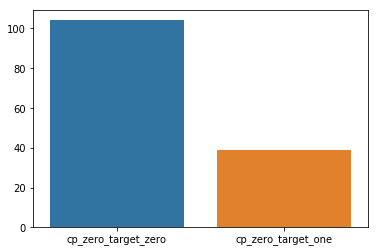

In [31]:
sns.barplot(x=['cp_zero_target_zero','cp_zero_target_one'],y=[cp_zero_target_zero,cp_zero_target_one])
plt.show()

In [32]:
cp_one_target_zero = len(data[(data.Cp == 1)&(data.Target == 0)])
cp_one_target_one = len(data[(data.Cp == 1)&(data.Target == 1)])
print("Cp One Target Zero",cp_one_target_zero)
print("Cp One Target One",cp_one_target_one)

Cp One Target Zero 9
Cp One Target One 41


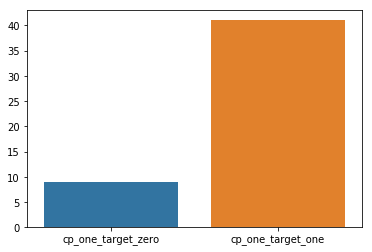

In [33]:
sns.barplot(x=['cp_one_target_zero','cp_one_target_one'],y=[cp_one_target_zero,cp_one_target_one])
plt.show()

In [34]:
cp_two_target_zero = len(data[(data.Cp == 2)&(data.Target == 0)])
cp_two_target_one = len(data[(data.Cp == 2)&(data.Target == 1)])
print("Cp Two Target Zero",cp_two_target_zero)
print("Cp Two Target One",cp_two_target_one)

Cp Two Target Zero 18
Cp Two Target One 69


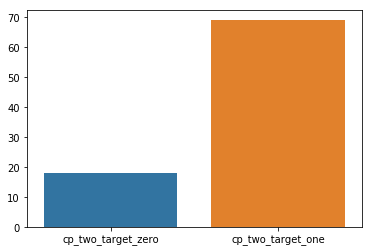

In [35]:
sns.barplot(x=['cp_two_target_zero','cp_two_target_one'],y=[cp_two_target_zero,cp_two_target_one])
plt.show()

In [36]:
cp_three_target_zero = len(data[(data.Cp == 3)&(data.Target == 0)])
cp_three_target_one = len(data[(data.Cp == 3)&(data.Target == 1)])
print("Cp Three Target Zero",cp_three_target_zero)
print("Cp Three Target One",cp_three_target_one)

Cp Three Target Zero 7
Cp Three Target One 16


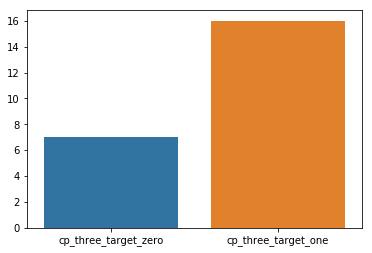

In [37]:
sns.barplot(x=['cp_three_target_zero','cp_three_target_one'],y=[cp_three_target_zero,cp_three_target_one])
plt.show()

AgeRange Analysis

In [38]:
agerange_zero_target_zero = len(data[(data.AgeRange == 0)&(data.Target == 0)])
agerange_zero_target_one = len(data[(data.AgeRange == 0)&(data.Target == 1)])
print("AgeRange zero and Target zero",agerange_zero_target_zero)
print("AgeRange zero and Target one",agerange_zero_target_one)

AgeRange zero and Target zero 4
AgeRange zero and Target one 12


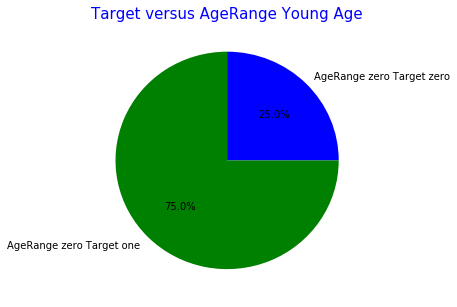

In [39]:
colors = ['blue','green']
explode = [0,0]
plt.figure(figsize=(5,5))
plt.pie([agerange_zero_target_zero,agerange_zero_target_one],explode=explode,colors=colors,labels=
       ['AgeRange zero Target zero','AgeRange zero Target one'],autopct='%1.1f%%')
plt.title("Target versus AgeRange Young Age",color='blue',fontsize=15)
plt.show()

In [40]:
agerange_one_target_zero = len(data[(data.AgeRange == 1)&(data.Target == 0)])
agerange_one_target_one = len(data[(data.AgeRange == 1)&(data.Target == 1)])
print("AgeRange one and Target zero",agerange_one_target_zero)
print("AgeRange one and Target one",agerange_one_target_one)

AgeRange one and Target zero 40
AgeRange one and Target one 88


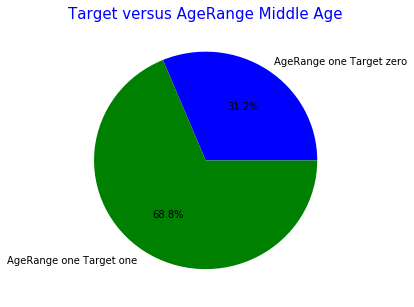

In [41]:
colors = ['blue','green']
explode = [0,0]
plt.figure(figsize=(5,5))
plt.pie([agerange_one_target_zero,agerange_one_target_one],explode=explode,colors=colors,labels=
       ['AgeRange one Target zero','AgeRange one Target one'],autopct='%1.1f%%')
plt.title("Target versus AgeRange Middle Age",color='blue',fontsize=15)
plt.show()

In [42]:
agerange_two_target_zero = len(data[(data.AgeRange == 2)&(data.Target == 0)])
agerange_two_target_one = len(data[(data.AgeRange == 2)&(data.Target == 1)])
print("AgeRange two and Target zero",agerange_two_target_zero)
print("AgeRange two and Target one",agerange_two_target_one)

AgeRange two and Target zero 94
AgeRange two and Target one 65


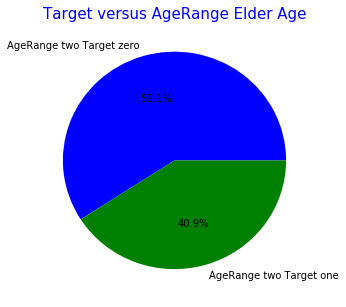

In [43]:
colors = ['blue','green']
explode = [0,0]
plt.figure(figsize=(5,5))
plt.pie([agerange_two_target_zero,agerange_two_target_one],explode=explode,colors=colors,labels=
       ['AgeRange two Target zero','AgeRange two Target one'],autopct='%1.1f%%')
plt.title("Target versus AgeRange Elder Age",color='blue',fontsize=15)
plt.show()

Thalach Analysis

In [44]:
data.Thalach.value_counts()

162    11
160     9
163     9
173     8
152     8
125     7
132     7
150     7
172     7
143     7
144     7
156     6
169     6
158     6
140     6
142     6
178     5
161     5
154     5
165     5
168     5
174     5
170     5
182     5
179     5
157     5
147     5
145     4
131     4
130     4
       ..
181     2
180     2
106     1
97      1
99      1
113     1
95      1
90      1
88      1
117     1
202     1
118     1
177     1
194     1
192     1
190     1
188     1
187     1
185     1
184     1
167     1
121     1
195     1
137     1
134     1
129     1
128     1
127     1
124     1
71      1
Name: Thalach, Length: 91, dtype: int64

In [45]:
data.Thalach.value_counts()[:20]

162    11
160     9
163     9
173     8
152     8
125     7
132     7
150     7
172     7
143     7
144     7
156     6
169     6
158     6
140     6
142     6
178     5
161     5
154     5
165     5
Name: Thalach, dtype: int64

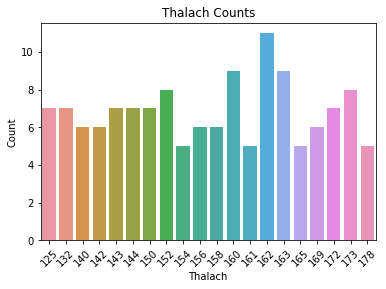

In [46]:
sns.barplot(x=data.Thalach.value_counts()[:20].index, y=data.Thalach.value_counts()[:20].values)
plt.xlabel("Thalach")
plt.ylabel("Count")
plt.title("Thalach Counts")
plt.xticks(rotation=45)
plt.show()

In [47]:
age_unique = sorted(data.Age.unique())
print("Age Unique",age_unique)

Age Unique [29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 76, 77]


In [48]:
age_thalach_values = data.groupby("Age")['Thalach'].count().values
print(age_thalach_values)

[ 1  2  4  2  3  4  3 10  8  8 11  8  7  5  7  5  7 12 13  8 16  8 11 17
 19 14 11  8 11  9 10  8  7  9  4  3  4  3  1  1  1]


In [49]:
mean_thalach = []
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['Age'] == age].Thalach)/age_thalach_values[i])
mean_thalach

[202.0,
 183.0,
 160.5,
 178.5,
 176.0,
 163.25,
 157.66666666666666,
 164.7,
 160.25,
 154.875,
 168.8181818181818,
 155.875,
 150.14285714285714,
 149.6,
 166.28571428571428,
 152.2,
 151.28571428571428,
 148.5,
 167.23076923076923,
 138.0,
 147.75,
 139.625,
 145.63636363636363,
 143.8235294117647,
 146.8421052631579,
 147.57142857142858,
 148.0,
 145.125,
 133.63636363636363,
 153.66666666666666,
 133.0,
 146.125,
 138.85714285714286,
 135.55555555555554,
 139.25,
 142.66666666666666,
 122.25,
 139.0,
 121.0,
 116.0,
 162.0]

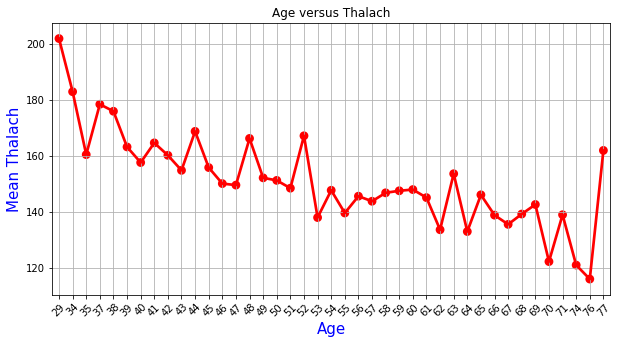

In [50]:
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel("Age",color='blue',fontsize=15)
plt.xticks(rotation=45)
plt.ylabel("Mean Thalach",color='blue',fontsize=15)
plt.title("Age versus Thalach")
plt.grid()
plt.show()

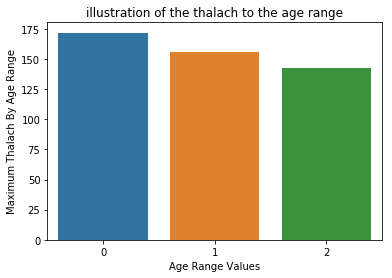

In [51]:
age_range_thalach = data.groupby("AgeRange")['Thalach'].mean()
sns.barplot(x=age_range_thalach.index,y=age_range_thalach.values)
plt.xlabel('Age Range Values')
plt.ylabel('Maximum Thalach By Age Range')
plt.title('illustration of the thalach to the age range')
plt.show()

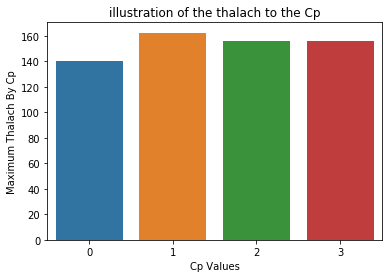

In [52]:
cp_thalach = data.groupby("Cp")['Thalach'].mean()
sns.barplot(x=cp_thalach.index,y=cp_thalach.values)
plt.xlabel('Cp Values')
plt.ylabel('Maximum Thalach By Cp')
plt.title('illustration of the thalach to the Cp')
plt.show()

Thal Analysis

In [53]:
data.Thal.value_counts()

2    166
3    117
1     18
0      2
Name: Thal, dtype: int64

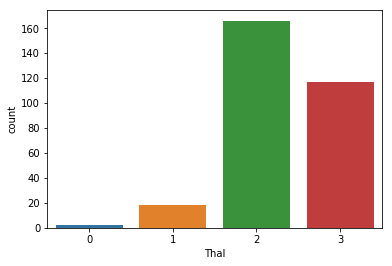

In [54]:
sns.countplot(data.Thal)

In [55]:
data[(data.Thal == 0)]

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target,AgeRange
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0,1


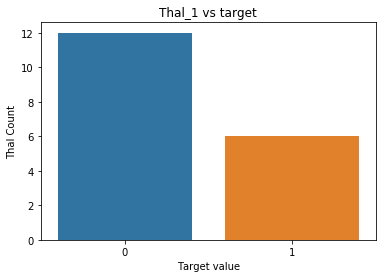

In [56]:
th1_and_t = data[(data.Thal == 1)].Target.value_counts()
sns.barplot(x=th1_and_t.index,y=th1_and_t.values)
plt.xlabel("Target value")
plt.ylabel("Thal Count")
plt.title("Thal_1 vs target")
plt.show()

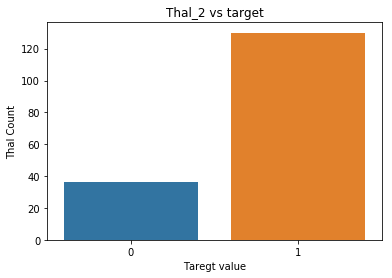

In [57]:
th2_and_t = data[(data.Thal == 2)].Target.value_counts()
sns.barplot(x=th2_and_t.index,y=th2_and_t.values)
plt.xlabel("Taregt value")
plt.ylabel("Thal Count")
plt.title("Thal_2 vs target")
plt.show()

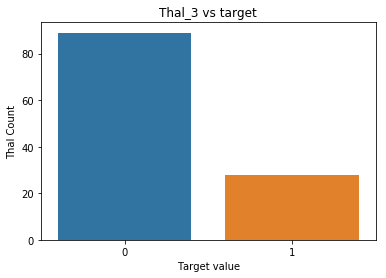

In [58]:
th3_and_t = data[(data.Thal == 3)].Target.value_counts()
sns.barplot(x=th3_and_t.index,y=th3_and_t.values)
plt.xlabel("Target value")
plt.ylabel("Thal Count")
plt.title("Thal_3 vs target")
plt.show()

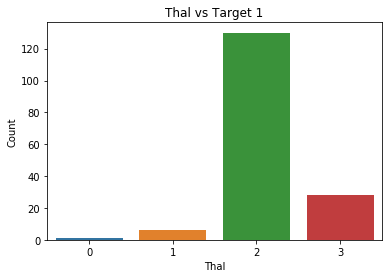

In [59]:
t1_and_th = data[(data['Target'] == 1)].Thal.value_counts()
sns.barplot(x=t1_and_th.index,y=t1_and_th.values)
plt.xlabel("Thal")
plt.ylabel("Count")
plt.title("Thal vs Target 1")
plt.show()

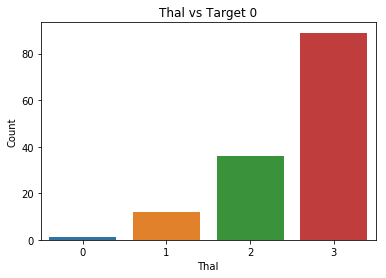

In [60]:
t0_and_th = data[(data['Target'] == 0)].Thal.value_counts()
sns.barplot(x=t0_and_th.index,y=t0_and_th.values)
plt.xlabel("Thal")
plt.ylabel("Count")
plt.title("Thal vs Target 0")
plt.show()

In [61]:
data.Target.unique()

array([1, 0], dtype=int64)

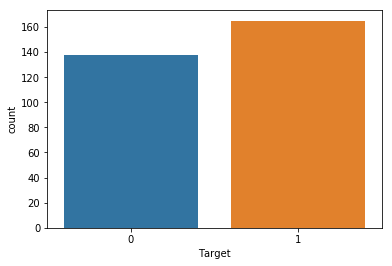

In [62]:
sns.countplot(data.Target)

In [63]:
age_counter_target_1 = []
age_counter_target_0 = []
for age in data.Age.unique():
    age_counter_target_1.append(len(data[(data['Age'] == age)&(data.Target == 1)]))
    age_counter_target_0.append(len(data[(data['Age'] == age)&(data.Target == 0)]))

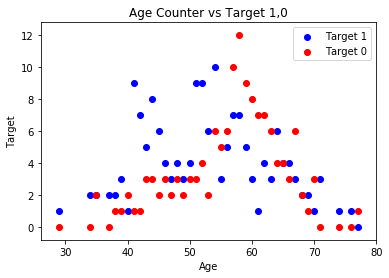

In [64]:
plt.scatter(x=data.Age.unique(),y=age_counter_target_1,color='blue',label='Target 1')
plt.scatter(x=data.Age.unique(),y=age_counter_target_0,color='red',label='Target 0')
plt.xlabel("Age")
plt.ylabel("Target")
plt.title("Age Counter vs Target 1,0")
plt.legend(loc='upper right')
plt.show()

In [65]:
male_young_t_1=data[(data['Sex']==1)&(data['AgeRange']==0)&(data['Target']==1)]
male_middle_t_1=data[(data['Sex']==1)&(data['AgeRange']==1)&(data['Target']==1)]
male_elderly_t_1=data[(data['Sex']==1)&(data['AgeRange']==2)&(data['Target']==1)]
print(len(male_young_t_1))
print(len(male_middle_t_1))
print(len(male_elderly_t_1))

7
55
31


No handles with labels found to put in legend.


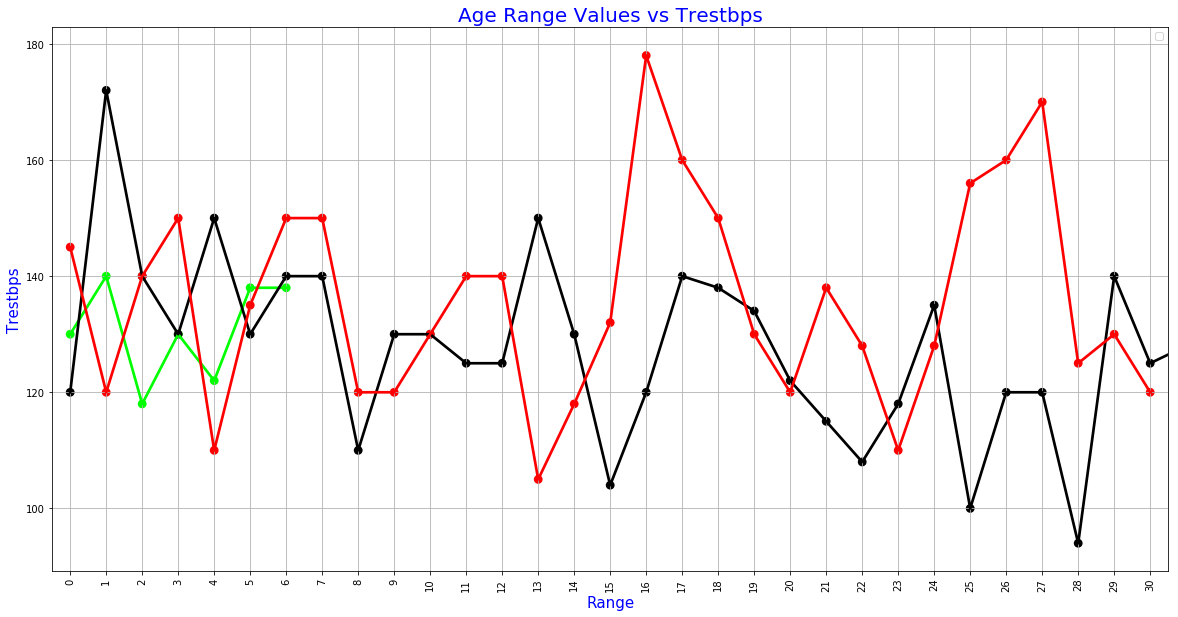

In [66]:
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x=np.arange(len(male_young_t_1)),y=male_young_t_1.Trestbps,color='lime',alpha=0.8,label='Young')
sns.pointplot(x=np.arange(len(male_middle_t_1)),y=male_middle_t_1.Trestbps,color='black',alpha=0.8,label='Middle')
sns.pointplot(x=np.arange(len(male_elderly_t_1)),y=male_elderly_t_1.Trestbps,color='red',alpha=0.8,label='Elderly')
plt.xlabel('Range',fontsize = 15,color='blue')
plt.xticks(rotation=90)
plt.legend(loc='upper right',frameon=True)
plt.ylabel('Trestbps',fontsize = 15,color='blue')
plt.title('Age Range Values vs Trestbps',fontsize = 20,color='blue')
plt.grid()
plt.show()

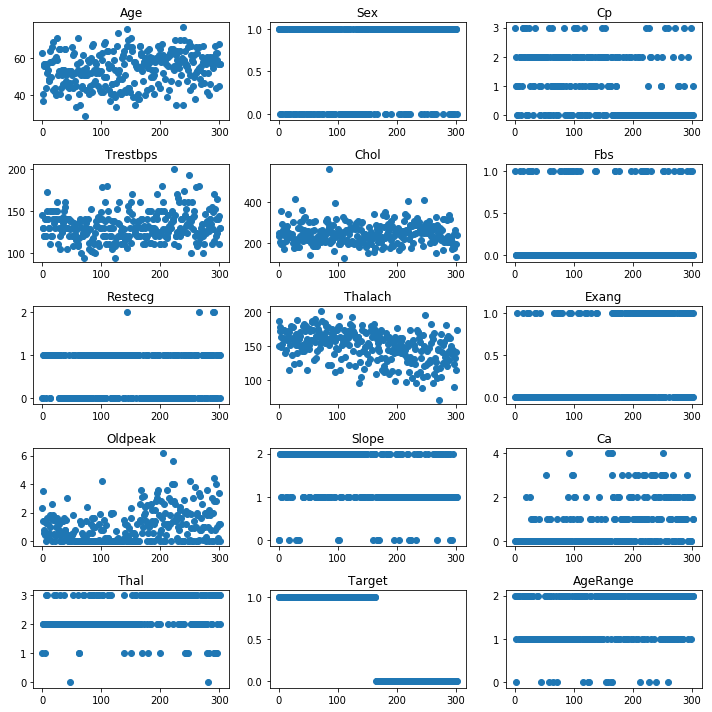

In [67]:
for i,col in enumerate(data.columns.values):
    plt.subplot(5,3,i+1)
    plt.scatter([i for i in range(303)],data[col].values.tolist())
    plt.title(col)
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(10,10)
    plt.tight_layout()
plt.show()

Modeling and Training data 

In [68]:
dataX = data.drop('Target',axis=1)
dataY = data['Target']

In [69]:
X_train,X_test,y_train,y_test = train_test_split(dataX,dataY,test_size=0.2,random_state=42)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (242, 14)
y_train (242,)
X_test (61, 14)
y_test (61,)


In [70]:
X_train = (X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test = (X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

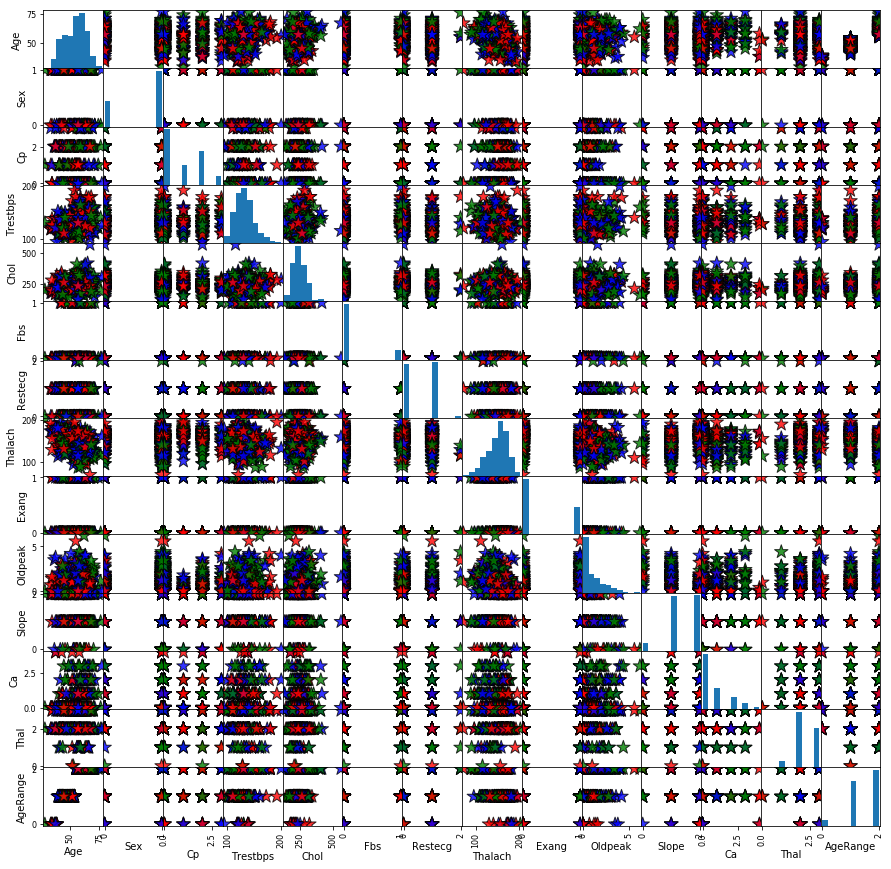

In [71]:
pd.plotting.scatter_matrix(dataX,color=['green','blue','red'],
                          figsize=[15,15],diagonal='hist',alpha=0.8,
                          s=200,marker='*',edgecolor='black')
plt.show()

In [72]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
print(pca.explained_variance_ratio_)

[0.25469663 0.18507128 0.12078331 0.09473366 0.07632096 0.06299566
 0.05784547 0.0434439  0.03021766 0.02315831 0.01991441 0.0160836
 0.00989288 0.00484226]


In [73]:
cumulative = np.cumsum(pca.explained_variance_ratio_)
cumulative

array([0.25469663, 0.43976792, 0.56055122, 0.65528488, 0.73160585,
       0.79460151, 0.85244698, 0.89589088, 0.92610854, 0.94926684,
       0.96918126, 0.98526486, 0.99515774, 1.        ])

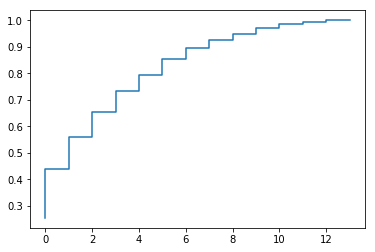

In [74]:
plt.step([i for i in range(len(cumulative))],cumulative)
plt.show()

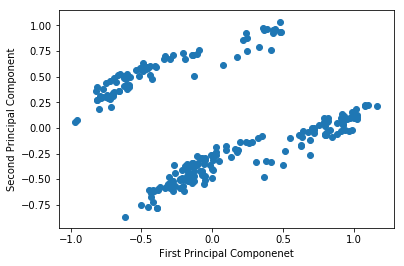

In [75]:
pca = PCA(n_components=8)
pca.fit(X_train)
reduced_data_train = pca.transform(X_train)
plt.scatter(reduced_data_train[:,0],reduced_data_train[:,1],label='reduced')
plt.xlabel("First Principal Componenet")
plt.ylabel("Second Principal Component")
plt.show()

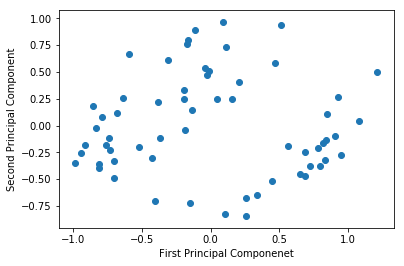

In [76]:
pca = PCA(n_components=8)
pca.fit(X_test)
reduced_data_test = pca.transform(X_test)
plt.scatter(reduced_data_test[:,0],reduced_data_test[:,1],label='reduced')
plt.xlabel("First Principal Componenet")
plt.ylabel("Second Principal Component")
plt.show()

In [77]:
reduced_data_train = pd.DataFrame(reduced_data_train,columns=['Dim1','Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
reduced_data_test = pd.DataFrame(reduced_data_test,columns=['Dim1','Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
X_train = reduced_data_train
X_test = reduced_data_test

Logistic Regression

In [79]:
from sklearn.metrics import accuracy_score
reg = LogisticRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score",acc_score)
train_score = reg.score(X_train,y_train)
print("Train score",train_score)
test_score = reg.score(X_test,y_test)
print("Test score",test_score)

Accuracy Score 0.7540983606557377
Train score 0.8347107438016529
Test score 0.7540983606557377


[[21  8]
 [ 7 25]]


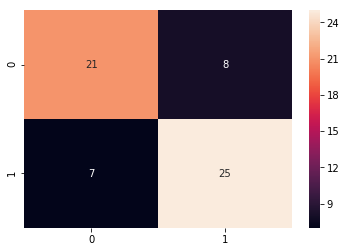

In [80]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

K-Nearest Neighbors

In [81]:
knn = KNeighborsClassifier(n_jobs=2,n_neighbors=22)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score",acc_score)
train_score = knn.score(X_train,y_train)
print("Train score",train_score)
test_score = knn.score(X_test,y_test)
print("Test score",test_score)

Accuracy Score 0.7377049180327869
Train score 0.7851239669421488
Test score 0.7377049180327869


[[19 10]
 [ 6 26]]


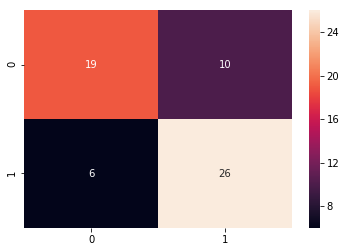

In [82]:
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

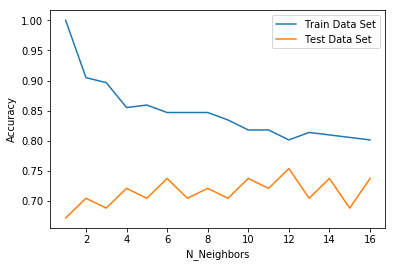

In [83]:
n_neighbors = range(1,17)
train_data_accuracy = []
test_data_accuracy = []
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = n_neigh,n_jobs=5)
    knn.fit(X_train,y_train)
    train_data_accuracy.append(knn.score(X_train,y_train))
    test_data_accuracy.append(knn.score(X_test,y_test))
plt.plot(n_neighbors,train_data_accuracy,label='Train Data Set')
plt.plot(n_neighbors,test_data_accuracy,label='Test Data Set')
plt.xlabel("N_Neighbors")
plt.ylabel("Accuracy")
plt.legend(loc = 'upper right')
plt.show()

[0.8071969696969697, 0.7496212121212121, 0.8238636363636364, 0.7871212121212122, 0.8155303030303029, 0.8030303030303031, 0.8026515151515151, 0.793939393939394, 0.7609848484848486, 0.7651515151515151, 0.7776515151515152, 0.7727272727272728, 0.7765151515151515, 0.7768939393939394, 0.7768939393939392, 0.768560606060606]


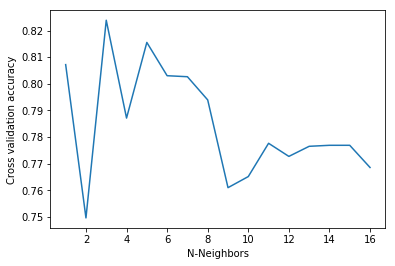

In [84]:
n_neighbors = range(1,17)
k_scores = []
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = n_neigh,n_jobs=5)
    scores = cross_val_score(estimator=knn,X=X_train,y=y_train,cv=12)
    k_scores.append(scores.mean())
print(k_scores)
plt.plot(n_neighbors,k_scores)
plt.xlabel("N-Neighbors")
plt.ylabel("Cross validation accuracy")
plt.show()

Naive Baes

In [85]:
svc = SVC().fit(X_train,y_train)
y_pred = svc.predict(X_test)
acc_score = accuracy_score(y_test,y_pred)
print("Accuracy score",acc_score)
train_score = svc.score(X_train,y_train)
print("Train score",train_score)
test_score = svc.score(X_test,y_test)
print("Test score",test_score)

Accuracy score 0.7377049180327869
Train score 0.8099173553719008
Test score 0.7377049180327869


[[19 10]
 [ 6 26]]


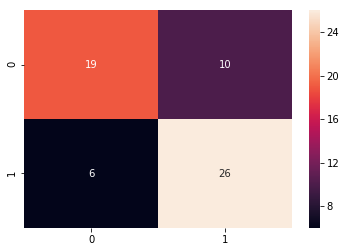

In [86]:
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

Gradient Boosting Classifier

In [87]:
gbc = GradientBoostingClassifier().fit(X_train,y_train)
y_pred = gbc.predict(X_test)
acc_score = accuracy_score(y_test,y_pred)
print("Accuracy score",acc_score)
train_score = gbc.score(X_train,y_train)
print("Train score",train_score)
test_score = gbc.score(X_test,y_test)
print("Test score",test_score)

Accuracy score 0.7377049180327869
Train score 1.0
Test score 0.7377049180327869


[[19 10]
 [ 6 26]]


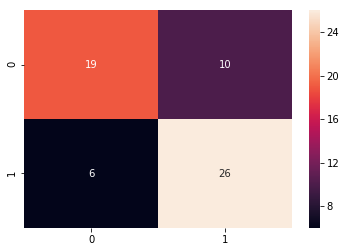

In [88]:
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

Random Forest Classifier

In [89]:
rfc = RandomForestClassifier().fit(X_train,y_train)
y_pred = rfc.predict(X_test)
acc_score = accuracy_score(y_test,y_pred)
print("Accuracy score",acc_score)
train_score = rfc.score(X_train,y_train)
print("Train score",train_score)
test_score = rfc.score(X_test,y_test)
print("Test score",test_score)

Accuracy score 0.5901639344262295
Train score 0.987603305785124
Test score 0.5901639344262295


[[18 11]
 [14 18]]


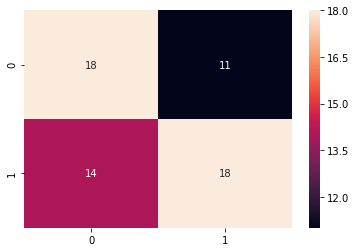

In [90]:
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()